In [182]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d
from numba import njit
import importlib
import galaxy

In [183]:
importlib.reload(galaxy)

<module 'galaxy' from '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/note/galaxy.py'>

In [15]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [168]:
sub_l5 = {}
sub_l4 = {}
for idx in tqdm(np.arange(400+1)):
    try:
        sub_l5[idx] = arepo.Subfind(basepath + 'runs/MW7_GSE4/lvl5-denscut/output/', idx)
    except:
        continue
    
    try:
        sub_l4[idx] = arepo.Subfind(basepath + 'runs/MW7_GSE4/lvl4-denscut/output/', idx)
    except:
        continue

100%|██████████| 401/401 [00:53<00:00,  7.54it/s]


In [169]:
idx = 110
print('lvl5', sub_l5[110].SubhaloPos[0])
print('lvl4', sub_l4[110].SubhaloPos[0])

lvl5 [685.5208  692.03217 590.2361 ]
lvl4 [683.14935 690.21936 591.60675]


In [20]:
def get_orbit(sub):
    Time = []
    Orbit = []
    for idx in sub.keys():
        if len(sub[idx].SubhaloPos) > 1:
            rdiff = sub[idx].SubhaloPos[1] - sub[idx].SubhaloPos[0]
        else:
            rdiff = np.array([0., 0., 0.])
    
        Orbit.append(rdiff)
        Time.append(sub[idx].Time)

    Orbit = np.array(Orbit)
    Time = np.array(Time)
    
    return Time, Orbit

In [22]:
Time_l5, Orbit_l5 = get_orbit(sub_l5)
Time_l4, Orbit_l4 = get_orbit(sub_l4)

rorb_l5 = np.linalg.norm(Orbit_l5, axis=1)
rorb_l4 = np.linalg.norm(Orbit_l4, axis=1)

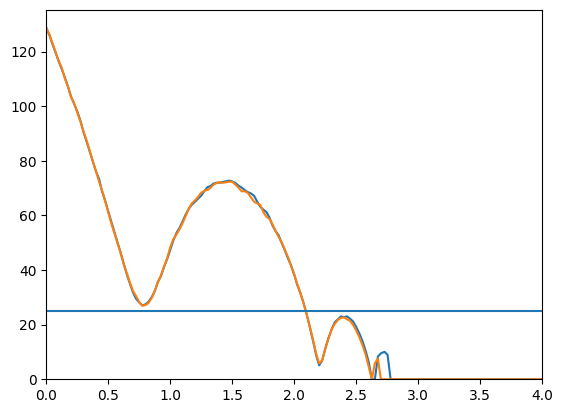

In [25]:
plt.plot(Time_l5, rorb_l5)
plt.plot(Time_l4, rorb_l4)
plt.ylim(0, None)
plt.xlim(0, 4)
plt.axhline(25)

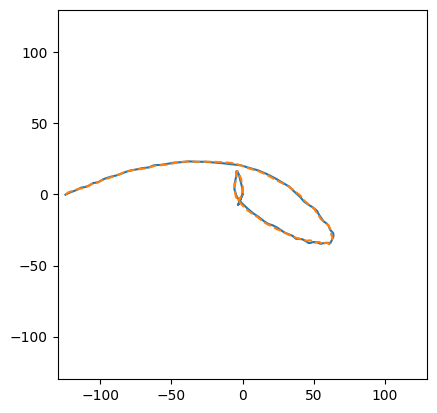

In [29]:
plt.plot(Orbit_l5[:,0], Orbit_l5[:,1])
plt.plot(Orbit_l4[:,0], Orbit_l4[:,1], ls='dashed')

plt.xlim(-130, 130)
plt.ylim(-130, 130)

plt.gca().set_aspect('equal')

# Star formation rate

In [308]:
sfr = {}
sfr['MW7_GSE4_lvl5'] = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut/output/sfr.txt')
sfr['MW7_GSE4_lvl4'] = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut/output/sfr.txt')
sfr['MW7iso_lvl5']   = np.genfromtxt(basepath + 'runs/MW7iso/lvl5/output/sfr.txt')
sfr['MW7iso_lvl4']   = np.genfromtxt(basepath + 'runs/MW7iso/lvl4/output/sfr.txt')
sfr['GSE4iso_lvl5']  = np.genfromtxt(basepath + 'runs/GSE4iso/lvl5/output/sfr.txt')
# sfr['GSE4iso_lvl4']  = np.genfromtxt(basepath + 'runs/GSE4iso/lvl4/output/sfr.txt')

# sfr['MW7_GSE4_lvl5-steep'] = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-steep/output/sfr.txt')
sfr['MW7_GSE4_lvl5-newsoft'] = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-newsoft/output/sfr.txt')

sfr['MW6iso_lvl5-newsoft'] = np.genfromtxt(basepath + 'runs/MW6iso/lvl5-beta08-dens-newsoft/output/sfr.txt')
sfr['MW6iso_lvl5-newsoft-Z2'] = np.genfromtxt(basepath + 'runs/MW6iso/lvl5-beta08-dens-newsoft-Z2/output/sfr.txt')
sfr['MW6iso_bt05_lvl5-newsoft'] = np.genfromtxt(basepath + 'runs/MW6iso/lvl5-beta05-dens-newsoft/output/sfr.txt')

sfr['MW6iso_RC5_vphi01'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC5-vphi01-newsoft/output/sfr.txt')
sfr['MW6iso_RC5_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC5-vphi02-newsoft/output/sfr.txt')
sfr['MW6iso_RC5_vphi03'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC5-vphi03-newsoft/output/sfr.txt')

sfr['MW6iso_bt05_RC5_vphi01'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta05-RC5-vphi01-newsoft/output/sfr.txt')
sfr['MW6iso_bt05_RC5_vphi01_Z2'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta05-RC5-vphi01-newsoft-Z2/output/sfr.txt')

sfr['MW6iso_bt05_RC5_vphi01_blg'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta05-RC5-vphi01-bulge-newsoft/output/sfr.txt')

(0.0, 12.035772)

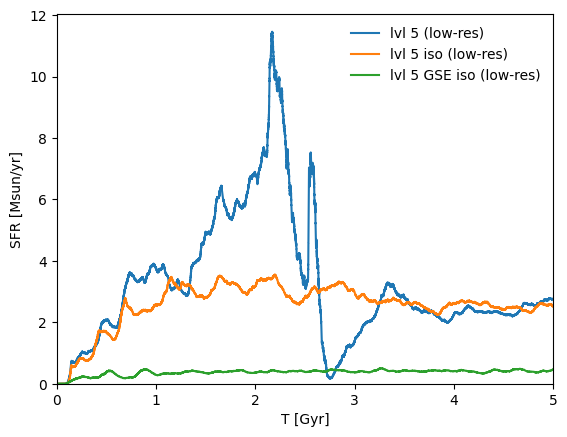

In [310]:
plt.plot(sfr['MW7_GSE4_lvl5'][:,0], sfr['MW7_GSE4_lvl5'][:,2], label='lvl 5 (low-res)')
# plt.plot(sfr['MW7_GSE4_lvl4'][:,0], sfr['MW7_GSE4_lvl4'][:,2], label='lvl 4 (high-res)')
plt.plot(sfr['MW7iso_lvl5'][:,0], sfr['MW7iso_lvl5'][:,2], label='lvl 5 iso (low-res)')
plt.plot(sfr['GSE4iso_lvl5'][:,0], sfr['GSE4iso_lvl5'][:,2], label='lvl 5 GSE iso (low-res)')
# plt.plot(sfr['MW7iso_lvl4'][:,0], sfr['MW7iso_lvl4'][:,2], label='lvl 4 (high-res)')
plt.legend(frameon=False)

plt.xlim(0, 5)
plt.xlabel('T [Gyr]')
plt.ylabel('SFR [Msun/yr]')

# plt.ylim(0.1, 20)
# plt.yscale('log')

plt.ylim(0, None)

# plt.axvline(110*0.025)
# plt.axvline(88*0.025)

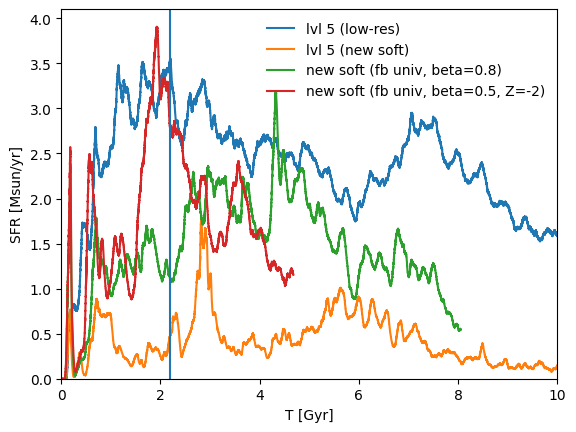

In [ ]:
# plt.plot(sfr['MW7_GSE4_lvl5'][:,0], sfr['MW7_GSE4_lvl5'][:,2], label='lvl 5 (low-res)')
plt.plot(sfr['MW7iso_lvl5'][:,0], sfr['MW7iso_lvl5'][:,2], label='lvl 5 (low-res)')
# plt.plot(sfr['MW7_GSE4_lvl4'][:,0], sfr['MW7_GSE4_lvl4'][:,2], label='lvl 4 (high-res)')
plt.plot(sfr['MW7_GSE4_lvl5-newsoft'][:,0], sfr['MW7_GSE4_lvl5-newsoft'][:,2], label='lvl 5 (new soft)')
plt.plot(sfr['MW6iso_lvl5-newsoft'][:,0], sfr['MW6iso_lvl5-newsoft'][:,2], label='new soft (fb univ, beta=0.8)')
# plt.plot(sfr['MW6iso_bt05_lvl5-newsoft'][:,0], sfr['MW6iso_bt05_lvl5-newsoft'][:,2], label='new soft (fb univ, beta=0.5)')
plt.plot(sfr['MW6iso_lvl5-newsoft-Z2'][:,0], sfr['MW6iso_lvl5-newsoft-Z2'][:,2], label='new soft (fb univ, beta=0.5, Z=-2)')
plt.legend(frameon=False)

plt.xlim(0, 10)
plt.xlabel('T [Gyr]')
plt.ylabel('SFR [Msun/yr]')

# plt.ylim(0.1, 20)
# plt.yscale('log')

plt.ylim(0, None)

# plt.axvline(110*0.025)
plt.axvline(88*0.025)

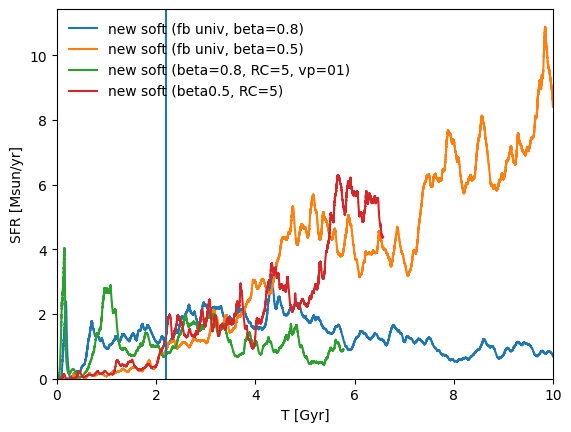

In [297]:
# plt.plot(sfr['MW7_GSE4_lvl5'][:,0], sfr['MW7_GSE4_lvl5'][:,2], label='lvl 5 (low-res)')
# plt.plot(sfr['MW7iso_lvl5'][:,0], sfr['MW7iso_lvl5'][:,2], label='old soft')
# plt.plot(sfr['MW7_GSE4_lvl4'][:,0], sfr['MW7_GSE4_lvl4'][:,2], label='lvl 4 (high-res)')
# plt.plot(sfr['MW7_GSE4_lvl5-newsoft'][:,0], sfr['MW7_GSE4_lvl5-newsoft'][:,2], label='lvl 5 (new soft)')
plt.plot(sfr['MW6iso_lvl5-newsoft'][:,0], sfr['MW6iso_lvl5-newsoft'][:,2], label='new soft (fb univ, beta=0.8)')
plt.plot(sfr['MW6iso_bt05_lvl5-newsoft'][:,0], sfr['MW6iso_bt05_lvl5-newsoft'][:,2], label='new soft (fb univ, beta=0.5)')
# plt.plot(sfr['MW6iso_lvl5-newsoft-Z2'][:,0], sfr['MW6iso_lvl5-newsoft-Z2'][:,2], label='new soft (fb univ, beta=0.5, Z=-2)')
plt.plot(sfr['MW6iso_RC5_vphi01'][:,0], sfr['MW6iso_RC5_vphi01'][:,2], label='new soft (beta=0.8, RC=5, vp=01)')
# plt.plot(sfr['MW6iso_RC5_vphi02'][:,0], sfr['MW6iso_RC5_vphi02'][:,2], label='new soft (beta=0.8, RC=5, vp=02)')
# plt.plot(sfr['MW6iso_RC5_vphi03'][:,0], sfr['MW6iso_RC5_vphi03'][:,2], label='new soft (beta=0.8, RC=5, vp=03)')
plt.plot(sfr['MW6iso_bt05_RC5_vphi01'][:,0], sfr['MW6iso_bt05_RC5_vphi01'][:,2], label='new soft (beta0.5, RC=5)')
# plt.plot(sfr['MW6iso_bt05_RC5_vphi01_Z2'][:,0], sfr['MW6iso_bt05_RC5_vphi01_Z2'][:,2], label='new soft (beta0.5, RC=5, Z=-2)')
# plt.plot(sfr['MW6iso_bt05_RC5_vphi01_blg'][:,0], sfr['MW6iso_bt05_RC5_vphi01_blg'][:,2], label='new soft (beta0.5, RC=5, bulge)')
plt.legend(frameon=False)

plt.xlabel('T [Gyr]')
plt.ylabel('SFR [Msun/yr]')

# plt.ylim(0.1, 20)
# plt.yscale('log')

plt.xlim(0, 10)
plt.ylim(0, None)

# plt.xlim(0, 0.3)
# plt.ylim(0, 1)

# plt.axvline(110*0.025)
plt.axvline(88*0.025)

In [301]:
for vp in ['01', '02', '03']:
    sn = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC5-vphi'+vp+'-newsoft/output', 120)
    is_star = sn.part4.GFM_StellarFormationTime > 0
    stmass = np.sum(sn.part4.mass.value[is_star])
    print('beta08, RC5, vphi'+vp+', newsoft: time=', sn.Time.value, 'stmass=', stmass)

sn = arepo.Snapshot(basepath + 'runs/MW6iso/lvl5-beta08-dens-newsoft/output', 120)
is_star = sn.part4.GFM_StellarFormationTime > 0
stmass = np.sum(sn.part4.mass.value[is_star])
print('beta08, RC9, vphi02, newsoft: time=', sn.Time.value, 'stmass=', stmass)

sn = arepo.Snapshot(basepath + 'runs/MW7iso/lvl5/output', 120)
is_star = sn.part4.GFM_StellarFormationTime > 0
stmass = np.sum(sn.part4.mass.value[is_star])
print('MW7iso, oldsoft: time=', sn.Time.value, 'stmass=', stmass)

beta08, RC5, vphi01, newsoft: time= 3.0029296875 stmass= 0.23276456
beta08, RC5, vphi02, newsoft: time= 3.0029296875 stmass= 0.25786075
beta08, RC5, vphi03, newsoft: time= 3.0029296875 stmass= 0.237683
beta08, RC9, vphi02, newsoft: time= 3.0029296875 stmass= 0.2529149
MW7iso, oldsoft: time= 3.0029296875 stmass= 0.51541674


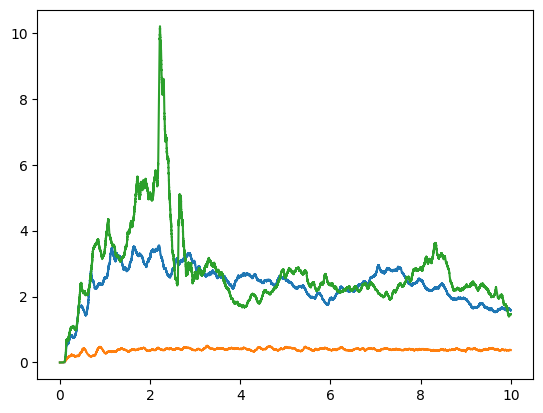

In [33]:
plt.plot(sfr['MW7iso_lvl5'][:,0], sfr['MW7iso_lvl5'][:,2])
plt.plot(sfr['GSE4iso_lvl5'][:,0], sfr['GSE4iso_lvl5'][:,2])
plt.plot(sfr['MW7_GSE4_lvl5'][:,0], sfr['MW7_GSE4_lvl5'][:,2])

In [34]:
importlib.reload(galaxy)

<module 'galaxy' from '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/note/galaxy.py'>

In [76]:
idx = 400
gal_MW7iso_l5 = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl5/output', idx, orient=True)
gal_MW7_GSE4_l5 = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl5-denscut/output', idx, orient=True)

In [77]:
idx = 400
gal_MW7iso_l4 = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl4/output', idx, orient=True)
gal_MW7_GSE4_l4 = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl4-denscut/output', idx, orient=True)

In [78]:
def get_logFeH_logMgFe(gal):
    GFM_SOLAR_ABUNDANCE_HYDROGEN = 0.7388
    GFM_SOLAR_ABUNDANCE_MAGNESIUM = 0.0007
    GFM_SOLAR_ABUNDANCE_IRON   =   0.0013
    
    FeH = gal.sn.part4.GFM_Metals[:,8] / GFM_SOLAR_ABUNDANCE_IRON
    logFeH = np.log10(FeH)

    MgH = gal.sn.part4.GFM_Metals[:,6] / GFM_SOLAR_ABUNDANCE_MAGNESIUM
    MgFe = MgH/FeH
    logMgH = np.log10(MgH)
    logMgFe = np.log10(MgFe)
    
    return logFeH, logMgH, logMgFe

In [157]:
def plot_map(fig, ax, gal, subsamp=None, tform_min=0, tform_max=10):

    # vmin = 0.01
    # vmax = 0.15
    
    vmin = None
    # vmax = 0.008
    vmax = None
    
    logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
    
    # r = np.linalg.norm(gal.sn.part4.rotpos, axis=1)
    # key = r < 8
    
    R = np.linalg.norm(gal.sn.part4.rotpos[:,:2], axis=1)
    z = gal.sn.part4.rotpos[:,2]
    key_R = np.logical_and(R < 16, R > 4)
    key = np.logical_and(key_R, np.abs(z) < 3)
    
    tform = gal.sn.part4.GFM_StellarFormationTime
    key = np.logical_and(key, tform > tform_min)
    key = np.logical_and(key, tform < tform_max)
    
    mass = np.copy(gal.sn.part4.mass.value)
    
    # print('total stellar mass in SN:', np.sum(mass[key]), 'num of stars:', np.sum(key))
    
    if subsamp is not None and np.sum(key) > subsamp:
        key_w = np.where(key)[0]
        key_w = np.random.choice(key_w, subsamp, replace=False)
        key = np.full(len(key), False)
        key[key_w] = True
        print('subsampled to:', np.sum(key))

    # logFeH_bins  = np.linspace(-1, 0.75, 75)
    # logMgFe_bins = np.linspace(0.15, 0.4, 75)
    
    logFeH_bins  = np.linspace(-0.9, 0.6, 50)
    logMgFe_bins = np.linspace(-0.05, 0.45, 50) + 0.2

    mbin, x_edge, y_edge, _ = binned_statistic_2d(logFeH[key], logMgFe[key], mass[key], 
                                                     statistic='sum', bins=[logFeH_bins, logMgFe_bins])

    # downstairs = np.trapz(mbin, 0.5*(logMgFe_bins[1:] + logMgFe_bins[:-1]), axis=1)
    # downstairs = np.sum(mbin, axis=1)
    # downstairs[downstairs == 0.0] = 1e-20
    # mbin = (mbin.T / downstairs).T
        
    # mbin[mbin < vmin] = vmin
    
    extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
    
    # norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    norm = mpl.colors.PowerNorm(gamma=0.3)
    im = ax.imshow(mbin.T, origin='lower',
               extent=extent,
               norm=norm)

    return im, extent

total stellar mass in SN: 0.80011874 num of stars: 21972
(0.0, 0.012929651094964356)
total stellar mass in SN: 0.69190025 num of stars: 18762
(0.0, 0.010209972824668512)


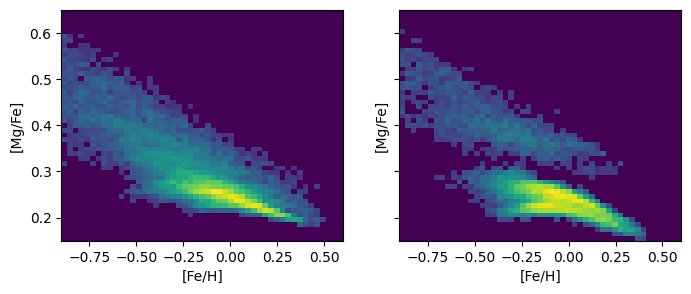

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)

im, extent = plot_map(fig, axs[0], gal_MW7iso_l5)
print(im.get_clim())
im, extent = plot_map(fig, axs[1], gal_MW7_GSE4_l5)
print(im.get_clim())

axs[0].set_xlim(extent[0], extent[1])
axs[0].set_ylim(extent[2], extent[3])
axs[0].set_aspect('auto')
axs[1].set_aspect('auto')

axs[0].set(xlabel='[Fe/H]', ylabel='[Mg/Fe]');
axs[1].set(xlabel='[Fe/H]', ylabel='[Mg/Fe]');


total stellar mass in SN: 0.9280308 num of stars: 215601
subsampled to: 21995
(0.0, 0.0015016011750503822)
total stellar mass in SN: 0.5034549 num of stars: 123562
subsampled to: 18797
(0.0, 0.001161559662932632)


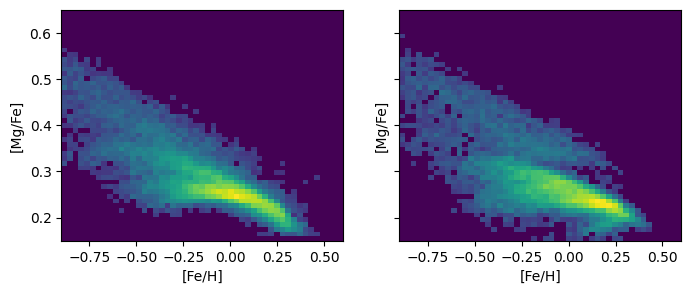

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)

vmin = 0.01
vmax = 0.15

im, extent = plot_map(fig, axs[0], gal_MW7iso_l4, subsamp=21995)
print(im.get_clim())
im, extent = plot_map(fig, axs[1], gal_MW7_GSE4_l4, subsamp=18797)
print(im.get_clim())

axs[0].set_xlim(extent[0], extent[1])
axs[0].set_ylim(extent[2], extent[3])
axs[0].set_aspect('auto')
axs[1].set_aspect('auto')

axs[0].set(xlabel='[Fe/H]', ylabel='[Mg/Fe]');
axs[1].set(xlabel='[Fe/H]', ylabel='[Mg/Fe]');


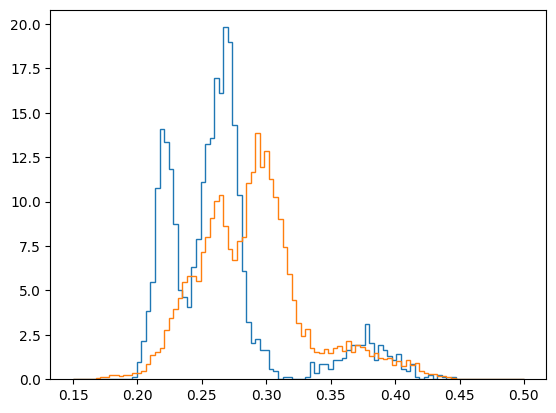

In [150]:
def get_logFeH_cut(gal):
    logFeH_mid = -0.25
    dlogFeH = 0.1
    
    tform_min =0.
    tform_max = 10
    
    R = np.linalg.norm(gal.sn.part4.rotpos[:,:2], axis=1)
    z = gal.sn.part4.rotpos[:,2]
    key_R = np.logical_and(R < 16, R > 4)
    key = np.logical_and(key_R, np.abs(z) < 3)
    
    tform = gal.sn.part4.GFM_StellarFormationTime
    key = np.logical_and(key, tform > tform_min)
    key = np.logical_and(key, tform < tform_max)
    
    logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
    key = np.logical_and(key, np.abs(logFeH - logFeH_mid) < dlogFeH/2.)
    return key, logMgFe

fig, ax = plt.subplots(1, 1)
bins = np.linspace(0.15, 0.5, 100)

key, logMgFe = get_logFeH_cut(gal_MW7iso_l5)
# ax.hist(logMgFe[key], density=True, bins=bins, histtype='step');

key, logMgFe = get_logFeH_cut(gal_MW7_GSE4_l5)
ax.hist(logMgFe[key], density=True, bins=bins, histtype='step');

key, logMgFe = get_logFeH_cut(gal_MW7iso_l4)
# ax.hist(logMgFe[key], density=True, bins=bins, histtype='step');

key, logMgFe = get_logFeH_cut(gal_MW7_GSE4_l4)
ax.hist(logMgFe[key], density=True, bins=bins, histtype='step');

[Text(0.5, 0, '[Fe/H]')]

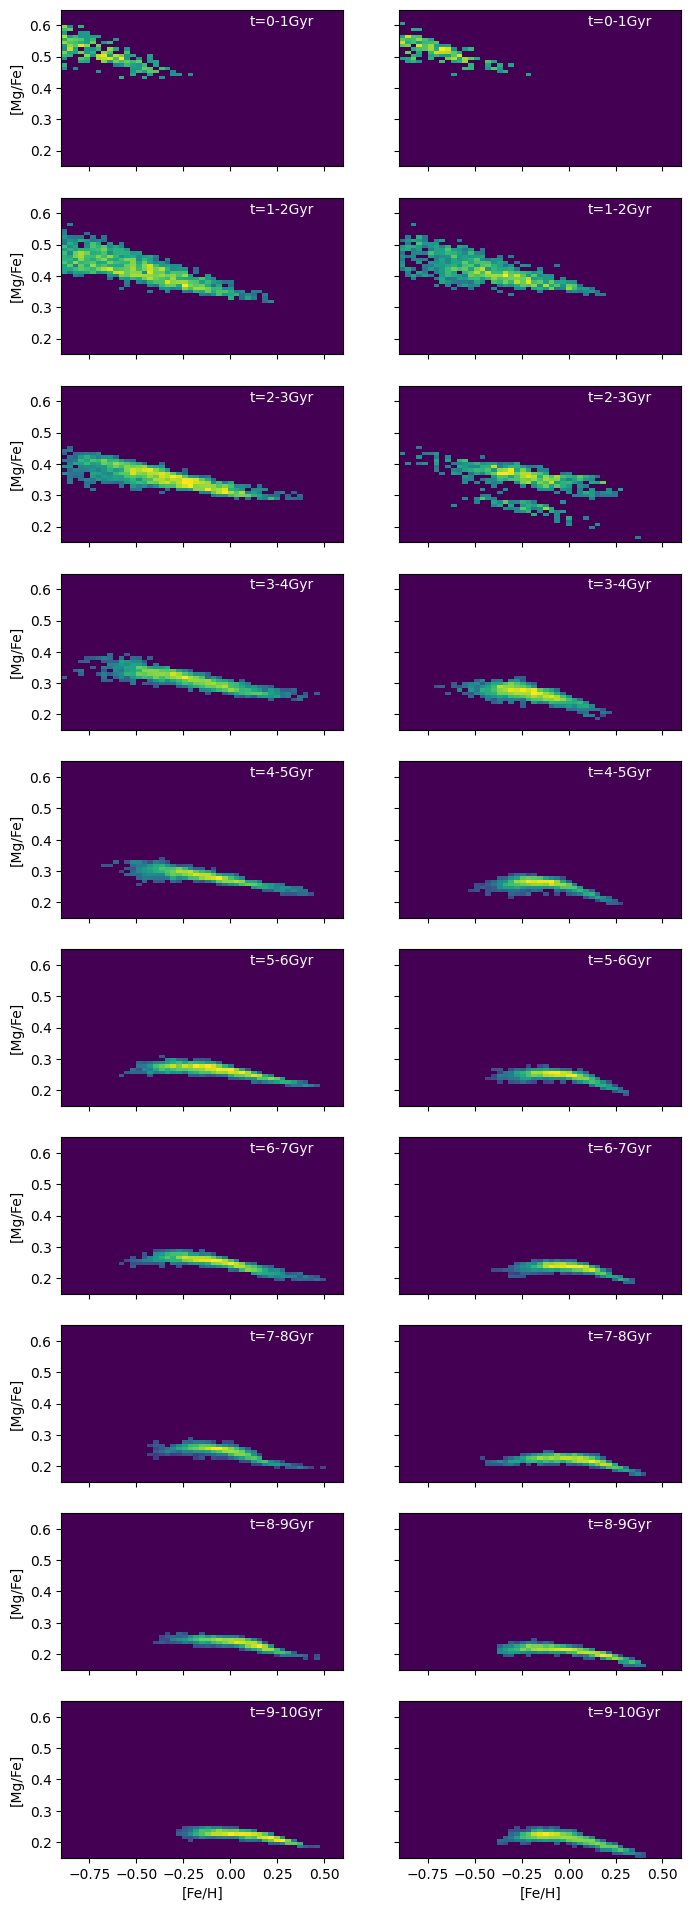

In [159]:
fig, axs = plt.subplots(10, 2, figsize=(8, 24), sharex=True, sharey=True)

tform_min_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
tform_max_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(tform_min_list)):
    tform_min = tform_min_list[i]
    tform_max = tform_max_list[i]
    
    im, extent = plot_map(fig, axs[i][0], gal_MW7iso_l5, tform_min=tform_min, tform_max=tform_max)
    im, extent = plot_map(fig, axs[i][1], gal_MW7_GSE4_l5, tform_min=tform_min, tform_max=tform_max)
    
    axs[i][0].text(0.1, 0.6, 't='+str(tform_min)+'-'+str(tform_max)+'Gyr', c='w')
    axs[i][1].text(0.1, 0.6, 't='+str(tform_min)+'-'+str(tform_max)+'Gyr', c='w')

    axs[i][0].set(ylabel='[Mg/Fe]')
    
axs[0][0].set_xlim(extent[0], extent[1])
axs[0][0].set_ylim(extent[2], extent[3])
for x in axs.ravel():
    x.set_aspect('auto')
    x.set_aspect('auto')

axs[len(tform_min_list)-1][0].set(xlabel='[Fe/H]')
axs[len(tform_min_list)-1][1].set(xlabel='[Fe/H]')

# axs[0].set(xlabel='[Fe/H]', ylabel='[Mg/Fe]');
# axs[1].set(xlabel='[Fe/H]', ylabel='[Mg/Fe]');


In [327]:
importlib.reload(galaxy)

idx = 50
gal_MW7_l5 = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl5/output', idx, orient=True)
gal_MW7_Ngb64_l5 = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl5-Ngb64/output', idx, orient=True)
gal_MW7_l4 = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl4/output', idx, orient=True)
gal_MW7_Ngb64_l4 = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl4-Ngb64/output', idx, orient=True)

max nH_l5= 14.110756
max nH_l5 (64)= 17.791533
max nH_l4= 20.683146
max nH_l4 (64)= 13.218643


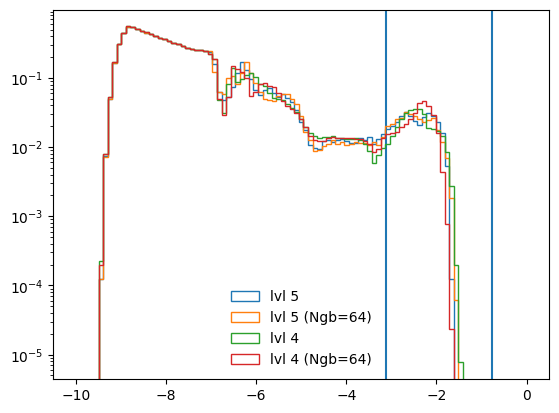

In [329]:
nH_l5 = gal_MW7_l5.sn.part0.nH
nH_Ngb64_l5 = gal_MW7_Ngb64_l5.sn.part0.nH
nH_l4 = gal_MW7_l4.sn.part0.nH
nH_Ngb64_l4 = gal_MW7_Ngb64_l4.sn.part0.nH

rho_l5 = gal_MW7_l5.sn.part0.rho.value
rho_Ngb64_l5 = gal_MW7_Ngb64_l5.sn.part0.rho.value
rho_l4 = gal_MW7_l4.sn.part0.rho.value
rho_Ngb64_l4 = gal_MW7_Ngb64_l4.sn.part0.rho.value

print('max nH_l5=', np.max(nH_l5))
print('max nH_l5 (64)=', np.max(nH_Ngb64_l5))
print('max nH_l4=', np.max(nH_l4))
print('max nH_l4 (64)=', np.max(nH_Ngb64_l4))


bins = np.linspace(-10, 0, 100)
plt.axvline(np.log10(0.000754654))
plt.axvline(np.log10(0.172583))
plt.hist(np.log10(rho_l5), histtype='step', bins=bins, density=True, label='lvl 5')
plt.hist(np.log10(rho_Ngb64_l5), histtype='step', bins=bins, density=True, label='lvl 5 (Ngb=64)')
plt.hist(np.log10(rho_l4), histtype='step', bins=bins, density=True, label='lvl 4');
plt.hist(np.log10(rho_Ngb64_l4), histtype='step', bins=bins, density=True, label='lvl 4 (Ngb=64)')

plt.legend(frameon=False)

plt.yscale('log')